In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [49]:
df = pd.read_csv('C:\programowanie\python_mrowa\wdfcs\zad4_is_1.txt', delim_whitespace=True, header=None, names=['T', 'R'])
df = df.replace(',', '.', regex=True)
df['T'] = df['T'].astype(float)
df['R'] = df['R'].astype(float)
print(df.head())
print(df.dtypes)

       T       R
0  499.7  3.2323
1  475.0  1.3853
2  450.3  2.3088
3  426.1  3.2323
4  401.8  4.1558
T    float64
R    float64
dtype: object


In [50]:
l=0.5 * 10**(-3)
s = 23.6 * 10**(-6)
print(l/s)
df['sigma']=1/df['R'] * l / s
df['ln(sigma)']=np.log(df['sigma'])
df['T']=df['T']+273.15
df['1/T']=1/df['T']
df['ln(T)']=np.log(df['T'])

df.head


21.1864406779661


<bound method NDFrame.head of          T            R      sigma  ln(sigma)       1/T     ln(T)
0   772.85       3.2323   6.554602   1.880167  0.001294  6.650085
1   748.15       1.3853  15.293756   2.727445  0.001337  6.617603
2   723.45       2.3088   9.176386   2.216633  0.001382  6.584031
3   699.25       3.2323   6.554602   1.880167  0.001430  6.550008
4   674.95       4.1558   5.098041   1.628856  0.001482  6.514639
5   650.35       4.6175   4.588293   1.523508  0.001538  6.477511
6   625.75       7.3880   2.867683   1.053504  0.001598  6.438951
7   600.65      10.1590   2.085485   0.735001  0.001665  6.398012
8   576.05      13.8530   1.529376   0.424860  0.001736  6.356194
9   551.75      23.0880   0.917639  -0.085952  0.001812  6.313095
10  526.95      41.5580   0.509804  -0.673729  0.001898  6.267106
11  502.85      69.2640   0.305880  -1.184564  0.001989  6.220292
12  454.75      92.3500   0.229415  -1.472224  0.002199  6.119748
13  431.15     277.0600   0.076469  -2.570873 

0.9912137290484869 -5663.019965748546 10.10189336346399
0.48800130315037193
0.00013618050080549407


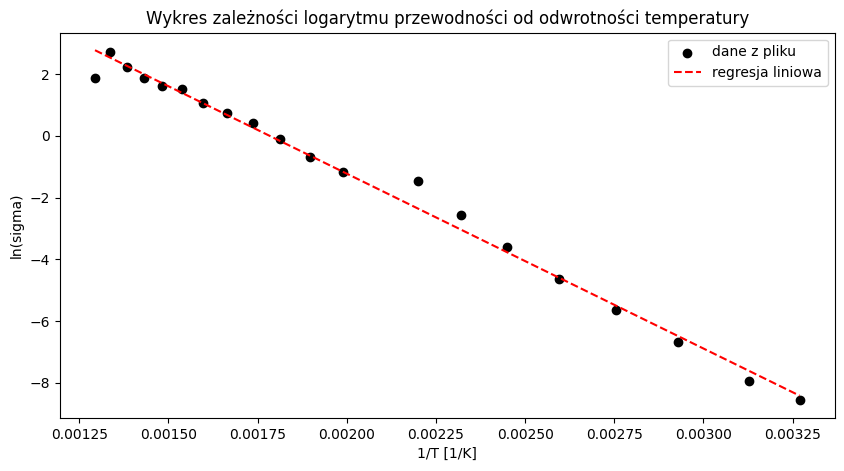

In [59]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.scatter(df['1/T'], df['ln(sigma)'], color='black', label='dane z pliku')
ax.set_xlabel('1/T [1/K]')
ax.set_ylabel('ln(sigma)')
ax.set_title('Wykres zależności logarytmu przewodności od odwrotności temperatury')

from scipy.stats import linregress

slope, intercept, r_value, p_value, std_err = linregress(df['1/T'], df['ln(sigma)'])

ax.plot(df['1/T'], intercept + slope*df['1/T'], color='red', linestyle='dashed', label='regresja liniowa')
ax.legend()

print(r_value**2, slope, intercept)
kB = 1.380649 * 10**(-23)
e = -kB * slope
e_eV = e / (1.602176634 * 10**(-19))
print(e_eV)

sigma = np.exp(slope/298 + intercept)
print(sigma)
